In [2]:
! pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 26.9 MB/s eta 0:00:00


In [3]:
from nilearn import datasets
from nilearn.datasets import load_mni152_template
from nilearn.image import resample_to_img
from nilearn import masking
from nilearn import image as nimg
from nilearn import plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLasso

In [4]:
adhd_dataset = datasets.fetch_adhd(n_subjects=2)
adhd_raw_data = nimg.get_data(nimg.load_img(adhd_dataset.func[0]))
print(adhd_raw_data.shape)


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/31769c9cee5cd55f045e62633d651f3d/adhd40_0010042.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/31769c9cee5cd55f045e62633d651f3d/adhd40_0010064.tgz..... done.


(61, 73, 61, 176)


In [5]:
from nilearn.decomposition import CanICA

In [8]:
ica = CanICA()
ica.fit(adhd_dataset.func)

CanICA()

In [9]:
from nilearn.plotting import plot_prob_atlas

/usr/local/lib/python3.10/dist-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


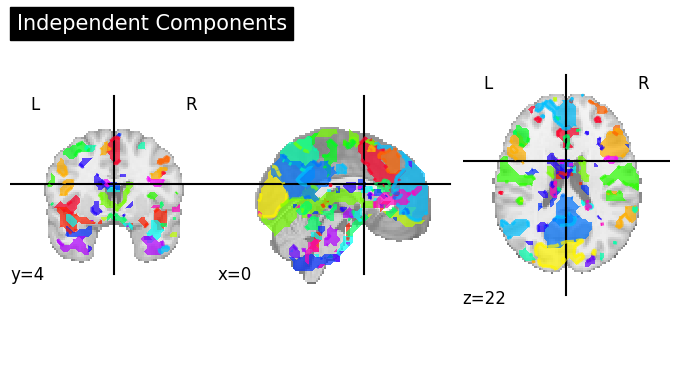

In [10]:
plot_prob_atlas(ica.components_img_, title='Independent Components')

In [11]:
template = load_mni152_template(resolution=4)
mask_img = masking.compute_epi_mask(template)

In [12]:
ica2 = CanICA(mask=mask_img)
ica2.fit(adhd_dataset.func)

/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


CanICA(mask=<nibabel.nifti1.Nifti1Image object at 0x7cddae65a950>)

/usr/local/lib/python3.10/dist-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


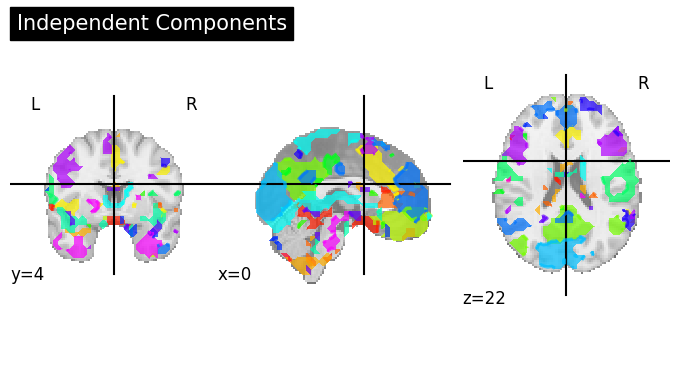

In [13]:
plot_prob_atlas(ica2.components_img_, title='Independent Components')